# Import library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from langdetect import detect,LangDetectException
from gensim.models import Word2Vec
import pickle
import numpy as np
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.manifold import TSNE

## Import Data (Not Cleaned)

In [2]:
data = pd.read_csv("Tweets.csv")

# Class WordCloud (visualisation) 

In [3]:
class TweetWordCloud:
    #Constructor
    def __init__(self, data):
        self.data = data
    #Method to Concatenate all tweets
    def concatenate_text(self):
        all_text = ' '.join(self.data['text'].astype(str))
        return all_text
    #Method to create the wordcloud
    def create_wordcloud(self, all_text):
        wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(all_text)
        return wordcloud
    #Method to display the wordwloud
    def display_wordcloud(self, wordcloud):
        plt.figure(figsize=(10, 7))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis('off')
        plt.show()
    #Method to generate the wordcloud using the previous methods
    def generate_wordcloud(self):
        all_text = self.concatenate_text()
        wordcloud = self.create_wordcloud(all_text)
        self.display_wordcloud(wordcloud)


## WordCloud 1

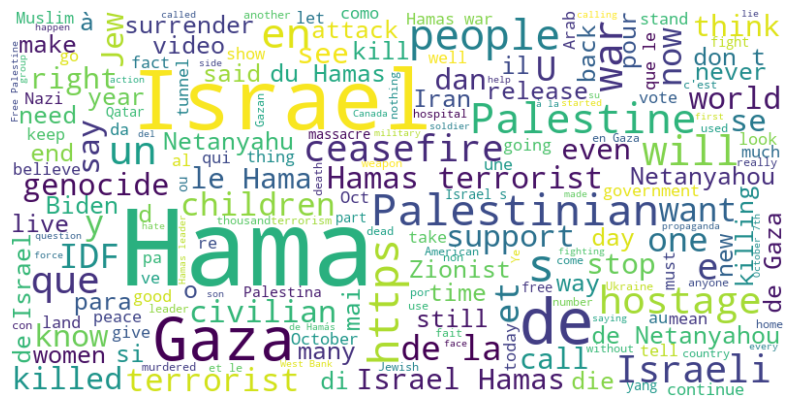

In [4]:
tweet_wordcloud_generator = TweetWordCloud(data)
tweet_wordcloud_generator.generate_wordcloud()

# Class Cleaning 

In [7]:
class TweetProcessor:
    #Constructor
    def __init__(self, file_path):
        # Initialisation de l'objet avec le chemin du fichier CSV
        self.df = pd.read_csv(file_path)
        # Conversion de la colonne 'text' en chaînes de caractères
        self.df['text'] = self.df['text'].astype(str)
    #Method to clean tweets
    def clean_tweet(self, tweet):
        """
        Cleans up a tweet by removing unnecessary links, special characters and spaces.
        """
        # Delete links
        tweet = re.sub(r'https\S+', '', tweet, flags=re.MULTILINE)
        # Delete special characters
        tweet = re.sub(r'\W', ' ', tweet)
        # Replace multiple spaces with a single space
        tweet = re.sub(r'\s+', ' ', tweet)
        # Remove leading and trailing spaces
        tweet = tweet.strip()
        return tweet
    # Method to tokenize the tweets
    def tokenize_and_lemmatize(self, tweet):
        """
        Tokenize and lemmatize a tweet by converting to lowercase, removing stop words and lemmatizing.
        """
        # Division of text into units  (tokens)
        tokens = word_tokenize(tweet)
        # Remove punctuation and numbers, convert to lowercase
        tokens = [word.lower() for word in tokens if word.isalpha()]
        # Remove stop words
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]
        # Lemmatization: the canonical form of a word, which represents its root or dictionary form
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
        # Join tokens into a text string
        return ' '.join(tokens)

    def process_tweets(self):
        """
        Applies cleanup and lemmatization functions to tweets in the DataFrame and delete non english words
        """
        # fuction that detects if a tweet is in english or not
        def lang(x):
            try:
                return detect(x) == 'en'
            except LangDetectException:
                return False

        # Filter tweets for English language
        self.df = self.df[self.df['text'].apply(lang)]

        # Apply cleaning function
        self.df['cleaned_text'] = self.df['text'].apply(self.clean_tweet)
        # Apply the tokenization and lemmatization function
        self.df['tokenized_and_lemmatized'] = self.df['cleaned_text'].apply(self.tokenize_and_lemmatize)


In [5]:
%run CleanTest.py

Exception: File `'CleanTest.py'` not found.

In [8]:
#Class inscatance
tweet_processor = TweetProcessor("Tweets.csv")
tweet_processor.process_tweets()

# Now, you can access the processed DataFrame with cleaned and tokenized/lemmatized text columns
processed_df = tweet_processor.df

In [6]:
processed_df.to_csv("CleanedTweets.csv")

NameError: name 'processed_df' is not defined

## Preview Cleaned Data 

In [7]:
processed_df

,id,link,text,date,likes,comments,cleaned_text,tokenized_and_lemmatized
0,0,https://twitter.com/HackneyPSC/status/17274436...,A statement from psychoanalytic activists: Th...,"Nov 22, 2023 · 9:47 PM UTC",0,0,A statement from psychoanalytic activists The ...,statement psychoanalytic activist bipocanalysi...
2,2,https://twitter.com/diamoundgirls2/status/1710...,Check out 🏒 35 + different ERIK KARLSSON cards...,"Oct 7, 2023 · 7:15 AM UTC",0,0,Check out 35 different ERIK KARLSSON cards lot...,check different erik karlsson card lot senator...
4,4,https://twitter.com/NoahIeeNG/status/172744319...,"AW OKAY.. WELL THATS COOL, IM SURE PAL WILL AP...","Nov 22, 2023 · 9:45 PM UTC",0,0,AW OKAY WELL THATS COOL IM SURE PAL WILL APPRE...,aw okay well thats cool im sure pal appreciate...
6,6,https://twitter.com/LCG000/status/172767038301...,"What you said to Eylon, that “Palestinian live...","Nov 23, 2023 · 12:48 PM UTC",0,0,What you said to Eylon that Palestinian lives ...,said eylon palestinian life important israeli ...
8,8,https://twitter.com/RaniaKhalek/status/1727633...,Israel killed the son of Lebanese MP Mohammad ...,"Nov 23, 2023 · 10:22 AM UTC",432,23,Israel killed the son of Lebanese MP Mohammad ...,israel killed son lebanese mp mohammad raad he...
...,...,...,...,...,...,...,...,...
15489,2416,https://twitter.com/KhellilMenacer/status/1734...,Free Palestine #NetanyahuTerorrist #netanyaho...,"Dec 11, 2023 · 10:00 PM UTC",0,0,Free Palestine NetanyahuTerorrist netanyahou_b...,free palestine netanyahuterorrist
15491,778,https://twitter.com/TheKingBee3000/status/1734...,"When Israel does it, it is bad warmongering! W...","Dec 13, 2023 · 1:12 AM UTC",0,0,When Israel does it it is bad warmongering Whe...,israel bad warmongering hamas fine
15493,1263,https://twitter.com/dog99_cat/status/173473651...,The Hamas terrorists are pure evil.,"Dec 13, 2023 · 12:46 AM UTC",0,0,The Hamas terrorists are pure evil,hamas terrorist pure evil
15495,4109,https://twitter.com/KaiKieferle1/status/173473...,Has Hamas' leadership stated it would abide by...,"Dec 13, 2023 · 12:47 AM UTC",0,0,Has Hamas leadership stated it would abide by ...,hamas leadership stated would abide resolution...


# Word2Vec

In [8]:
class Word2VecModel:
    #constructor
    def __init__(self, processed_df):
        self.processed_df = processed_df
        self.tokenized_text = self.tokenize_text()
        self.word2vec_model = self.train_word2vec_model()
        self.word_vectors = self.word2vec_model.wv
        self.all_word_vectors = self.create_word_vector_dictionary()

    def tokenize_text(self):
        return self.processed_df['tokenized_and_lemmatized'].apply(word_tokenize)

    def train_word2vec_model(self):
        return Word2Vec(sentences=self.tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

    def create_word_vector_dictionary(self):
        return {word: self.word_vectors[word] for word in self.word_vectors.index_to_key}

    def save_word_vectors_to_file(self, filename="all_word_vectors.pkl"):
        with open(filename, "wb") as f:
            pickle.dump(self.all_word_vectors, f)

    def load_word_vectors_from_file(self, filename="all_word_vectors.pkl"):
        with open(filename, "rb") as f:
            self.all_word_vectors = pickle.load(f)

    def get_vector_for_word(self, target_word):
        return self.all_word_vectors.get(target_word, None)
    
    def create_wordcloud(self):
        # Calculate word frequencies based on the magnitudes of word vectors
        word_frequencies = {word: np.linalg.norm(vector) for word, vector in self.all_word_vectors.items()}

        # Generate a Word Cloud visualization using word frequencies
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)

        # Display the Word Cloud using Matplotlib
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.show()
        
    def save_word_vectors_to_csv(self, filename="word_vectors.csv"):
        # Convert the dictionary to a DataFrame
        word_vectors_df = pd.DataFrame.from_dict(self.all_word_vectors, orient='index', columns=[f'dim_{i}' for i in range(self.word2vec_model.vector_size)])

        # Save the DataFrame to a CSV file
        word_vectors_df.to_csv(filename)



### Testing 

In [9]:
word2vec_model_instance = Word2VecModel(processed_df)

# Access the vector for a specific word
vector_for_word = word2vec_model_instance.get_vector_for_word('palestine')
print(vector_for_word)

[-1.3286281   1.1304703   0.53318226  0.07828982  0.9306539  -1.0342469
  0.28002784  1.5265794  -1.3780702  -0.80016387  0.14978866 -1.7921886
  0.3628397   0.5877033   0.89507097 -0.30668432  0.07865521 -0.91207945
 -0.43743536 -1.6145948   1.0382171   0.2085534   0.88945526 -0.1228468
  0.18942538  0.5790718  -0.2858043  -0.63557446 -0.7305972  -0.7661875
  0.9533088  -0.5759637  -0.1546159   0.43448997 -0.22157927  0.6206123
  0.5996689   0.24100503  0.04167014 -1.2352241   1.0120674  -0.5015848
 -0.21150456 -0.1612288  -0.1523523   0.05107164 -0.9514824  -0.67854565
  0.72553635  0.9347571   0.43028513 -0.74098057 -0.30648524 -0.29866722
 -0.30683017  0.02762177  0.6872321   0.19191375  0.03543259  0.00473099
  0.06271262 -0.32768014 -0.2694811   0.06421802 -0.8024018   0.8307941
  0.4129994   0.00429877 -0.90458506  0.92549086 -0.93697536 -0.26553473
  1.1566114   0.5640681   0.6040835  -0.1795     -0.2913758   0.16766116
 -0.8330962   0.48567864 -0.80345833 -0.2617998  -0.696572

In [10]:
#determinate the number of words in the dataset
len(word2vec_model_instance.all_word_vectors)

16302

## WordCloud 2

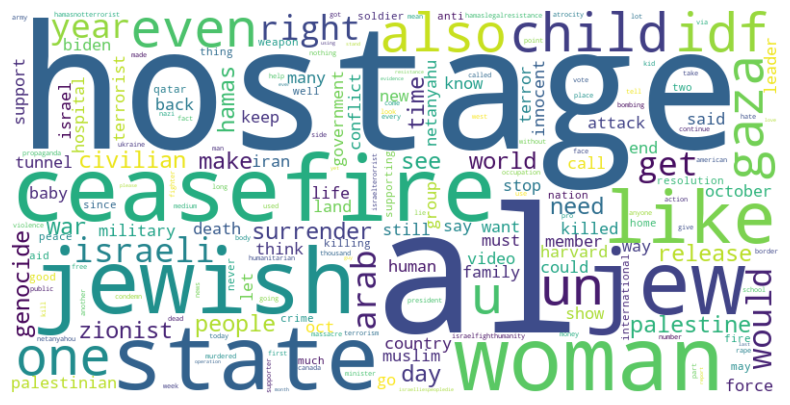

In [11]:
#wordcloud with clean data
word2vec_model_instance.create_wordcloud()

In [14]:
#Import the data in a csv file
word2vec_model_instance.save_word_vectors_to_csv()

# Doc2Vec

In [9]:
class Doc2VecModel:
    #constructor
    def __init__(self, processed_df):
        self.processed_df = processed_df
        self.tagged_data = self.tag_documents()
        self.doc2vec_model = self.train_doc2vec_model()
        self.doc_vectors = self.doc2vec_model.dv
        self.all_doc_vectors = self.create_doc_vector_dictionary()

    def tag_documents(self):
        # Tag documents for Doc2Vec training
        tagged_data = [TaggedDocument(words=word_tokenize(doc), tags=[str(idx)]) for idx, doc in enumerate(self.processed_df['tokenized_and_lemmatized'])]
        return tagged_data

    def train_doc2vec_model(self):
        # Train Doc2Vec model
        model = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4, epochs=10)
        model.build_vocab(self.tagged_data)
        model.train(self.tagged_data, total_examples=model.corpus_count, epochs=model.epochs)
        return model

    def create_doc_vector_dictionary(self):
        return {str(idx): self.doc_vectors[str(idx)] for idx in range(len(self.processed_df))}

    def save_doc_vectors_to_file(self, filename="all_doc_vectors.pkl"):
        with open(filename, "wb") as f:
            pickle.dump(self.all_doc_vectors, f)

    def load_doc_vectors_from_file(self, filename="all_doc_vectors.pkl"):
        with open(filename, "rb") as f:
            self.all_doc_vectors = pickle.load(f)

    def get_vector_for_doc(self, idx):
        return self.all_doc_vectors.get(str(idx), None)
    
    def save_doc_vectors_to_csv(self, filename="doc_vectors.csv"):
        # Convert the dictionary to a DataFrame
        doc_vectors_df = pd.DataFrame.from_dict(self.all_doc_vectors, orient='index', columns=[f'dim_{i}' for i in range(self.doc2vec_model.vector_size)])

        # Save the DataFrame to a CSV file
        doc_vectors_df.to_csv(filename)
    def save_model_to_file(self, filename="doc2vec_model.pkl"):
        with open(filename, "wb") as f:
            pickle.dump(self.doc2vec_model, f)



In [10]:
#class instance
doc2vec_model_instance = Doc2VecModel(processed_df)

# Save the document vectors to a CSV file
doc2vec_model_instance.save_doc_vectors_to_csv()
doc2vec_model_instance.save_model_to_file("trained_doc2vec_model.pkl")
